In [1]:
import pandas as pd
import missingno as mno
import xgboost as xgb
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics,svm
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn import tree,preprocessing 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import *
from sklearn.preprocessing import *
import warnings
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
warnings.filterwarnings('ignore')

In [2]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_train2 = pd.read_excel("train.xlsx")


In [3]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_train = df_train.drop("Loan_ID",axis=1)

In [5]:
df_train = df_train.drop("Gender",axis=1)

df_demise =df_train.drop("Loan_Status", axis=1)
y = df_train['Loan_Status']

In [6]:
df_demise = pd.get_dummies(df_demise)

In [7]:
df_demise

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,0,1,0,1,0,1,0,0,0,1


In [8]:
df_demise["Loan_Status"] = df_train['Loan_Status']

In [9]:
df_demise["Income"] = (df_demise["ApplicantIncome"] + df_demise["CoapplicantIncome"])

In [10]:
df_demise=df_demise.drop(["ApplicantIncome","CoapplicantIncome"], axis=1)

In [11]:
df_demise

,LoanAmount,Loan_Amount_Term,Credit_History,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Income
0,NaN,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1,Y,5849.0
1,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,N,6091.0
2,66.0,360.0,1.0,0,1,1,0,0,0,1,0,0,1,0,0,1,Y,3000.0
3,120.0,360.0,1.0,0,1,1,0,0,0,0,1,1,0,0,0,1,Y,4941.0
4,141.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0,1,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,1,0,1,0,0,0,1,0,1,0,1,0,0,Y,2900.0
610,40.0,180.0,1.0,0,1,0,0,0,1,1,0,1,0,1,0,0,Y,4106.0
611,253.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,1,Y,8312.0
612,187.0,360.0,1.0,0,1,0,0,1,0,1,0,1,0,0,0,1,Y,7583.0


In [12]:
lb = LabelEncoder()
df_demise['Loan_Status'] = lb.fit_transform(df_demise['Loan_Status'])

In [13]:
df_demise = df_demise.dropna()

In [14]:
dfd = pd.read_csv("df1.csv")
dfd = dfd.drop(["Gender", "Self_Employed"], axis=1)
dfd['Loan_Status'] = lb.fit_transform(dfd['Loan_Status'])
dfd = pd.get_dummies(dfd)


In [15]:
df_demise = pd.read_csv("data_drop2.csv")

In [16]:
df_demise

,Value,Amount,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,CustomerId_y,duree_pay,jour_diff,SubscriptionId_SubscriptionId_1,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,1000.0,-1000.0,1085.0,1.0,0.0,0.0,26,0.0,30.0,1,...,1,0,0,0,0,0,0,0,1,0
1,500.0,-500.0,543.0,1.0,0.0,0.0,26,1.0,30.0,1,...,1,0,0,0,0,0,0,0,1,0
2,500.0,-500.0,543.0,1.0,0.0,0.0,26,0.0,30.0,1,...,0,1,0,0,0,0,0,0,1,0
3,500.0,-500.0,520.0,1.0,1.0,0.0,26,0.0,30.0,1,...,0,1,0,0,0,0,0,0,1,0
4,1500.0,-1500.0,1575.0,1.0,1.0,0.0,26,3.0,27.0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,5000.0,-5000.0,5200.0,1.0,1.0,0.0,1,0.0,30.0,0,...,1,0,0,0,0,0,0,1,0,0
1469,2500.0,-2500.0,2850.0,1.0,1.0,0.0,1,21.0,9.0,0,...,1,0,0,0,0,0,0,1,0,0
1470,500.0,-500.0,520.0,1.0,1.0,0.0,5,0.0,30.0,0,...,0,1,0,0,0,0,0,1,0,0
1471,3500.0,-3500.0,3763.0,1.0,1.0,0.0,2,8.0,22.0,0,...,0,0,0,0,0,1,0,1,0,0


In [17]:
X = df_demise.drop("IsDefaulted", axis=1)
y = df_demise["IsDefaulted"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [19]:
df_demise

,Value,Amount,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,CustomerId_y,duree_pay,jour_diff,SubscriptionId_SubscriptionId_1,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,1000.0,-1000.0,1085.0,1.0,0.0,0.0,26,0.0,30.0,1,...,1,0,0,0,0,0,0,0,1,0
1,500.0,-500.0,543.0,1.0,0.0,0.0,26,1.0,30.0,1,...,1,0,0,0,0,0,0,0,1,0
2,500.0,-500.0,543.0,1.0,0.0,0.0,26,0.0,30.0,1,...,0,1,0,0,0,0,0,0,1,0
3,500.0,-500.0,520.0,1.0,1.0,0.0,26,0.0,30.0,1,...,0,1,0,0,0,0,0,0,1,0
4,1500.0,-1500.0,1575.0,1.0,1.0,0.0,26,3.0,27.0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,5000.0,-5000.0,5200.0,1.0,1.0,0.0,1,0.0,30.0,0,...,1,0,0,0,0,0,0,1,0,0
1469,2500.0,-2500.0,2850.0,1.0,1.0,0.0,1,21.0,9.0,0,...,1,0,0,0,0,0,0,1,0,0
1470,500.0,-500.0,520.0,1.0,1.0,0.0,5,0.0,30.0,0,...,0,1,0,0,0,0,0,1,0,0
1471,3500.0,-3500.0,3763.0,1.0,1.0,0.0,2,8.0,22.0,0,...,0,0,0,0,0,1,0,1,0,0


In [20]:
X_scaled = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

In [21]:
X_scaled

,Value,Amount,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,CustomerId_y,duree_pay,jour_diff,SubscriptionId_SubscriptionId_1,SubscriptionId_SubscriptionId_4,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,-0.457108,0.455823,-0.405194,0.602185,-7.610519,0.203176,-0.801614,0.801579,3.061575,-0.063953,...,0.770815,-0.368372,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,-1.612906,1.629444,-0.063953
1,-0.462638,0.461351,-0.434472,0.602185,-7.610519,0.203176,-0.770201,0.801579,3.061575,-0.063953,...,0.770815,-0.368372,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,-1.612906,1.629444,-0.063953
2,-0.462638,0.461351,-0.434472,0.602185,-7.610519,0.203176,-0.801614,0.801579,3.061575,-0.063953,...,-1.297328,2.714649,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,-1.612906,1.629444,-0.063953
3,-0.462638,0.461351,-0.435714,0.602185,0.131397,0.203176,-0.801614,0.801579,3.061575,-0.063953,...,-1.297328,2.714649,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,-1.612906,1.629444,-0.063953
4,-0.451579,0.450294,-0.378725,0.602185,0.131397,0.203176,-0.707375,0.707342,3.061575,-0.063953,...,0.770815,-0.368372,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,-1.612906,1.629444,-0.063953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,-0.412873,0.411593,-0.182907,0.602185,0.131397,-0.826120,-0.801614,0.801579,-0.326629,-0.063953,...,0.770815,-0.368372,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,0.619999,-0.613706,-0.063953
1469,-0.440520,0.439237,-0.309851,0.602185,0.131397,-0.826120,-0.141944,0.141920,-0.326629,-0.063953,...,0.770815,-0.368372,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,0.619999,-0.613706,-0.063953
1470,-0.462638,0.461351,-0.435714,0.602185,0.131397,-0.661432,-0.801614,0.801579,-0.326629,-0.063953,...,-1.297328,2.714649,-0.045175,-0.058361,-0.42794,-0.189381,-0.249007,0.619999,-0.613706,-0.063953
1471,-0.429461,0.428179,-0.260532,0.602185,0.131397,-0.784948,-0.550311,0.550280,-0.326629,-0.063953,...,-1.297328,-0.368372,-0.045175,-0.058361,-0.42794,5.280374,-0.249007,0.619999,-0.613706,-0.063953


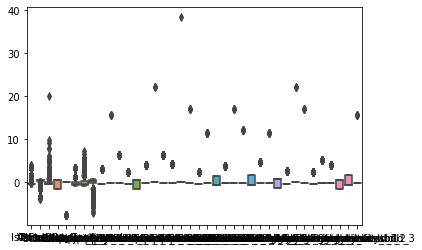

In [22]:
sns.boxplot(data = X_scaled)

In [23]:

# définition de la commande
pca = PCA()
# Sélection des variables quantitatives
 
# réduction d'échelle
data_PCA = pd.DataFrame(scale(X),columns=X.columns)
# composantes principales
C = pca.fit(data_PCA).transform(data_PCA)
C

array([[ 5.79538888e-01,  2.64030322e+00,  4.76913361e+00, ...,
        -1.23422006e-15,  1.70085284e-16,  1.51960976e-15],
       [ 5.73302466e-01,  2.63842011e+00,  4.76612669e+00, ...,
        -1.23997037e-16,  5.16608890e-15, -7.58421904e-15],
       [ 1.00268141e+00,  4.69211924e+00,  1.61102017e+00, ...,
        -5.12575095e-16,  4.47641040e-16,  1.74165437e-15],
       ...,
       [-1.34357960e+00,  1.47460661e+00, -2.48206554e+00, ...,
         2.74122001e-16,  1.38860262e-16,  2.84486646e-16],
       [-1.08520854e+00,  1.28514087e+00, -1.92212372e+00, ...,
         4.82288818e-16,  3.60904867e-16, -5.75936198e-16],
       [ 6.01280978e-01,  1.87524657e+00,  2.00172591e+00, ...,
        -4.57063944e-16, -1.07470472e-16,  3.53875585e-16]])

On peut voir ici que les premières variables générées concentrent le plus grand poids de données


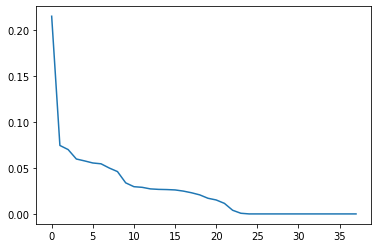

In [24]:
print("On peut voir ici que les premières variables générées concentrent le plus grand poids de données")
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [25]:
print("Taux (addition) de valeurs contenues dans les variables PCA 0 et 1:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]))

print("Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2:",
      (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]))

Taux (addition) de valeurs contenues dans les variables PCA 0 et 1: 0.28992000867921014
Taux (addition) de valeurs contenues dans les variables PCA 0, 1 et 2: 0.3600180207307985


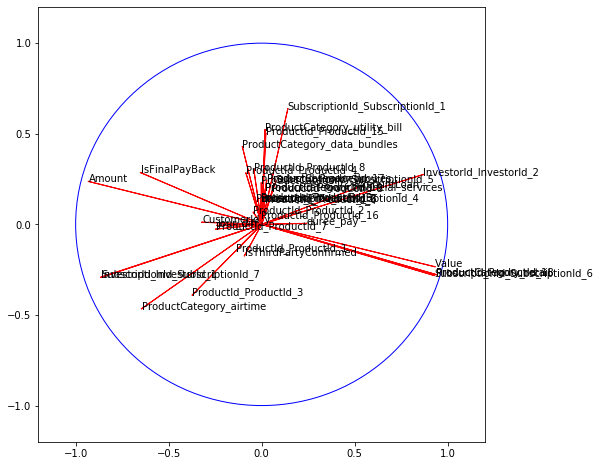

In [26]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_PCA.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

In [27]:
df_pcs=pca.transform(data_PCA)

In [28]:
df_pcs

array([[ 5.79538888e-01,  2.64030322e+00,  4.76913361e+00, ...,
        -1.23422006e-15,  1.70085284e-16,  1.51960976e-15],
       [ 5.73302466e-01,  2.63842011e+00,  4.76612669e+00, ...,
        -1.23997037e-16,  5.16608890e-15, -7.58421904e-15],
       [ 1.00268141e+00,  4.69211924e+00,  1.61102017e+00, ...,
        -5.12575095e-16,  4.47641040e-16,  1.74165437e-15],
       ...,
       [-1.34357960e+00,  1.47460661e+00, -2.48206554e+00, ...,
         2.74122001e-16,  1.38860262e-16,  2.84486646e-16],
       [-1.08520854e+00,  1.28514087e+00, -1.92212372e+00, ...,
         4.82288818e-16,  3.60904867e-16, -5.75936198e-16],
       [ 6.01280978e-01,  1.87524657e+00,  2.00172591e+00, ...,
        -4.57063944e-16, -1.07470472e-16,  3.53875585e-16]])

In [29]:
#X = X_scaled
#y = df_demise["Loan_Status"]

In [30]:
y_train

661     0.0
588     0.0
907     0.0
751     1.0
62      0.0
       ... 
763     0.0
835     0.0
1216    1.0
559     0.0
684     0.0
Name: IsDefaulted, Length: 736, dtype: float64

In [31]:
y_train.value_counts()

0.0    653
1.0     83
Name: IsDefaulted, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
#rus = RandomUnderSampler()
#X_train, y_train = rus.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(X_train))

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
X_train, y_train = ros.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(X_train))

In [34]:
y_test.value_counts()

0.0    257
1.0     38
Name: IsDefaulted, dtype: int64

In [35]:
y_train.value_counts()

0.0    1039
1.0     139
Name: IsDefaulted, dtype: int64

In [36]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       257
         1.0       0.67      0.53      0.59        38

    accuracy                           0.91       295
   macro avg       0.80      0.74      0.77       295
weighted avg       0.90      0.91      0.90       295



In [37]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dtr=dtree.fit(X_train, y_train)
dtrpred = dtree.predict(X_test)
print(classification_report(y_test,dtrpred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       257
         1.0       0.76      0.82      0.78        38

    accuracy                           0.94       295
   macro avg       0.86      0.89      0.88       295
weighted avg       0.94      0.94      0.94       295



In [38]:
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, y_train)
KNeighborsClassifierpred = knncla.predict(X_test)

In [39]:
print(classification_report(y_test,KNeighborsClassifierpred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       257
         1.0       0.81      0.76      0.78        38

    accuracy                           0.95       295
   macro avg       0.89      0.87      0.88       295
weighted avg       0.94      0.95      0.95       295



In [40]:
random_forest_classifier = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=4),RandomForestClassifier(random_state=0))
random_forest_classifier.fit(X_train,y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



In [42]:
regressionlogistique = LogisticRegression(solver = 'liblinear')
regressionlogistique.fit(X_train, y_train)

regressionlogistique_pred = regressionlogistique.predict(X_test)

In [43]:
print(classification_report(y_test,regressionlogistique_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       257
         1.0       0.83      0.79      0.81        38

    accuracy                           0.95       295
   macro avg       0.90      0.88      0.89       295
weighted avg       0.95      0.95      0.95       295



In [44]:
XGboostcla = xgb.XGBClassifier()
train_Xgboost = XGboostcla.fit(X_train, y_train)
predgbcla = train_Xgboost.predict(X_test)
print(classification_report(y_test,predgbcla))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       257
         1.0       0.75      0.79      0.77        38

    accuracy                           0.94       295
   macro avg       0.86      0.88      0.87       295
weighted avg       0.94      0.94      0.94       295



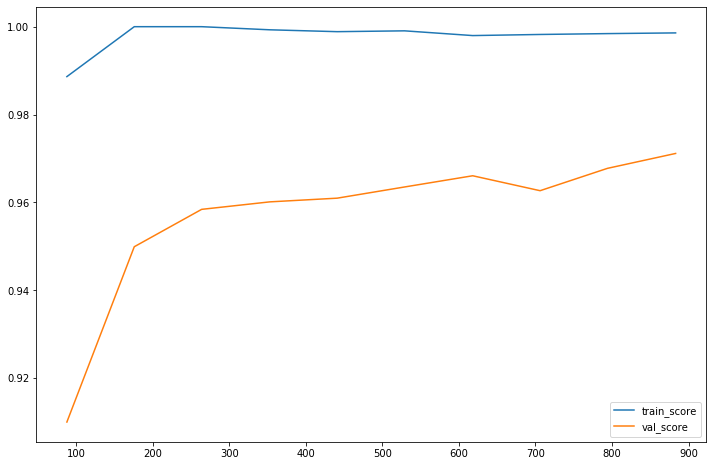

In [45]:
N, train_score,val_score = learning_curve(XGboostcla, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'accuracy')
plt.figure(figsize=(12,8))

plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

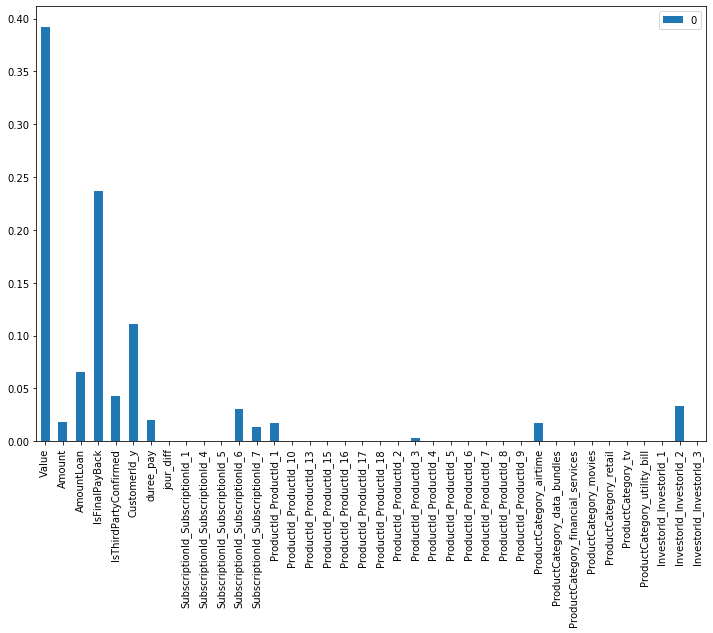

In [46]:
pd.DataFrame(XGboostcla.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

In [47]:
#pd.DataFrame(random_forest_classifier.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))

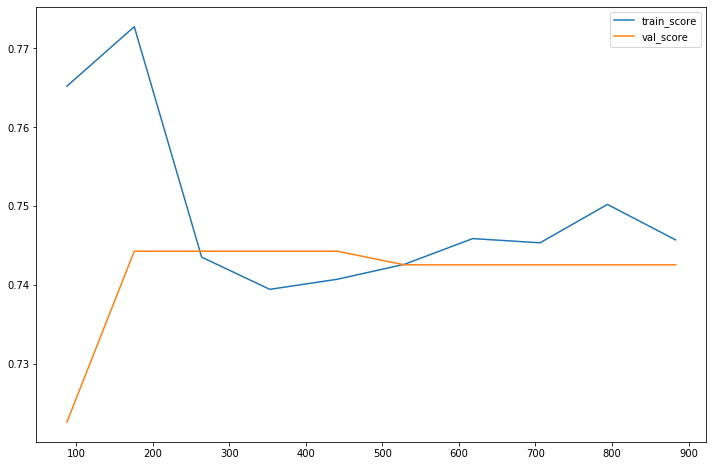

In [48]:
N, train_score,val_score = learning_curve(random_forest_classifier, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'f1')
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1),label='train_score')
plt.plot(N, val_score.mean(axis=1),label='val_score')
plt.legend()

In [81]:
def evaluate(model):
    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    N, train_score,val_score = learning_curve(model, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'accuracy')
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train_score')
    plt.plot(N, val_score.mean(axis=1),label='val_score')
    plt.title(f'{name}')
    plt.legend()
    plt.show()

    print("\n____________________________________________________________________________________\n")

In [82]:
Pipe = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=4))

In [83]:
random_forest_classifier = make_pipeline(Pipe, RandomForestClassifier(random_state=0))
adaboost = make_pipeline(Pipe, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(Pipe,StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(Pipe,StandardScaler(),KNeighborsClassifier())
regressionlogistique = make_pipeline(Pipe, LogisticRegression(solver = 'liblinear'))
dtree = make_pipeline(Pipe, tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0))
XGboostcla = make_pipeline(Pipe,xgb.XGBClassifier())

In [84]:
models_pipe = { 'random_forest_classifier' : random_forest_classifier,
               'adaboost' : adaboost,
               'SVM' : SVM,
               'KNN' : KNN,
               'regressionlogistique' : regressionlogistique,
               'dtree' : dtree,
               'XGboostcla' : XGboostcla}

random_forest_classifier
[[248   9]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



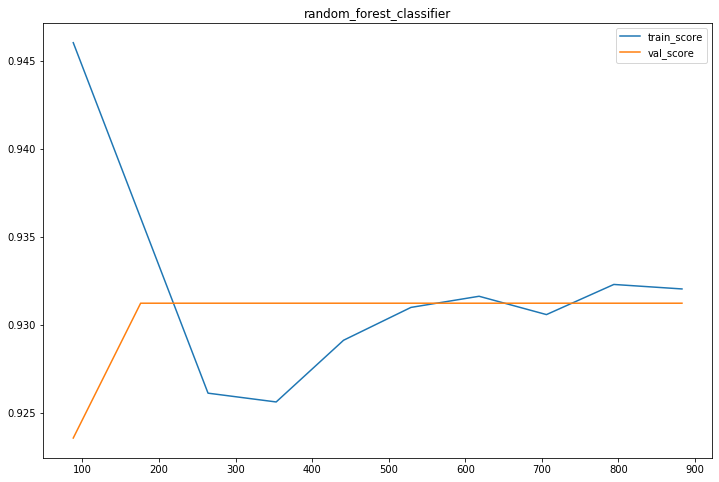


____________________________________________________________________________________

adaboost
[[245  12]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       257
         1.0       0.74      0.89      0.81        38

    accuracy                           0.95       295
   macro avg       0.86      0.92      0.89       295
weighted avg       0.95      0.95      0.95       295



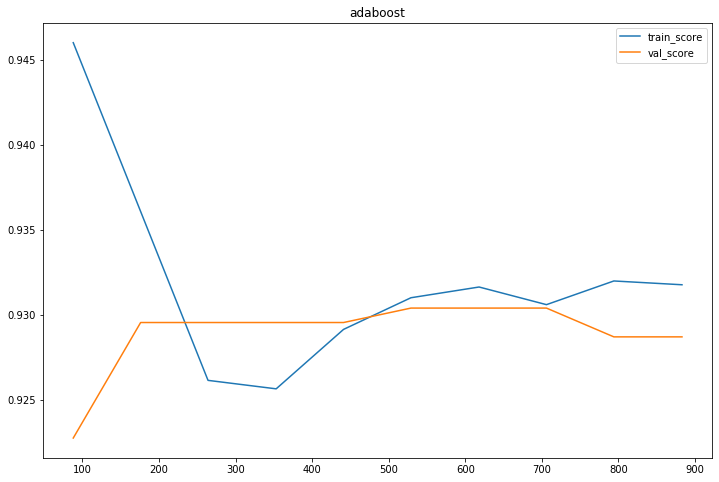


____________________________________________________________________________________

SVM
[[248   9]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



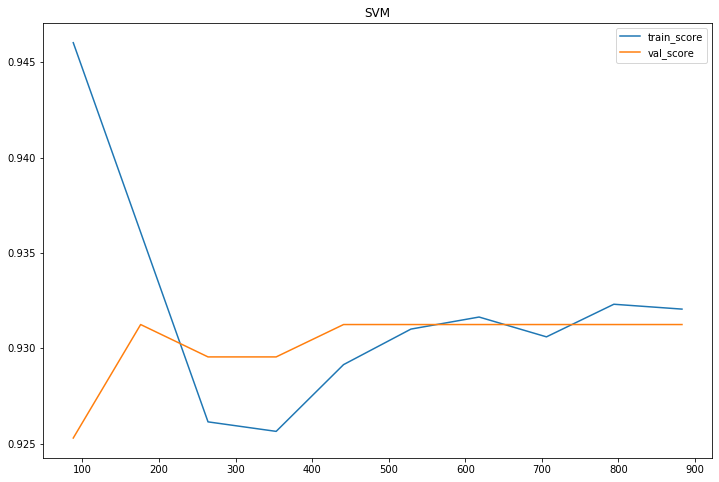


____________________________________________________________________________________

KNN
[[245  12]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       257
         1.0       0.74      0.89      0.81        38

    accuracy                           0.95       295
   macro avg       0.86      0.92      0.89       295
weighted avg       0.95      0.95      0.95       295



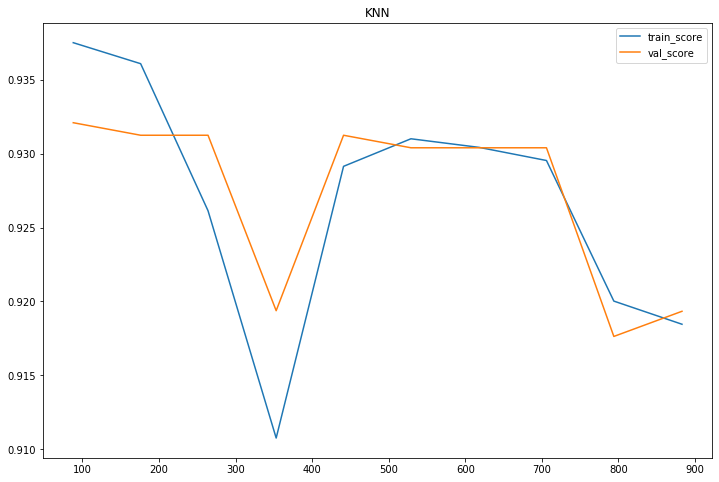


____________________________________________________________________________________

regressionlogistique
[[248   9]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



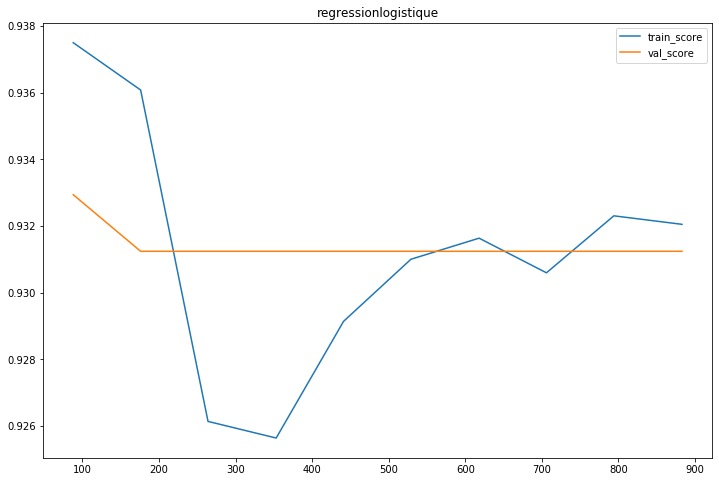


____________________________________________________________________________________

dtree
[[248   9]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



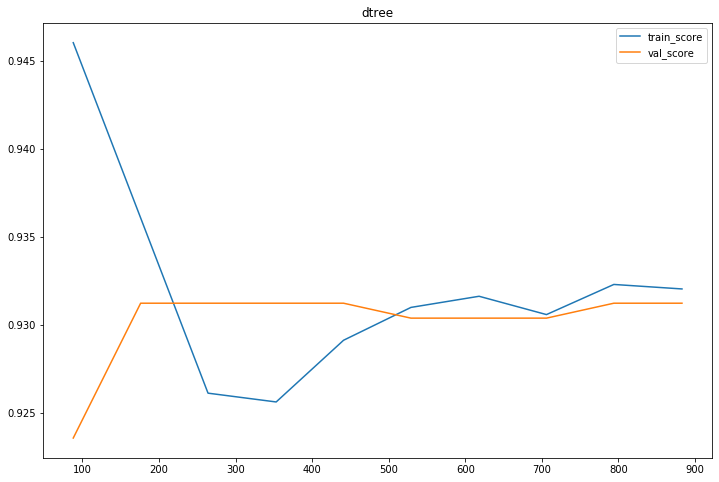


____________________________________________________________________________________

XGboostcla
[[248   9]
 [  4  34]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



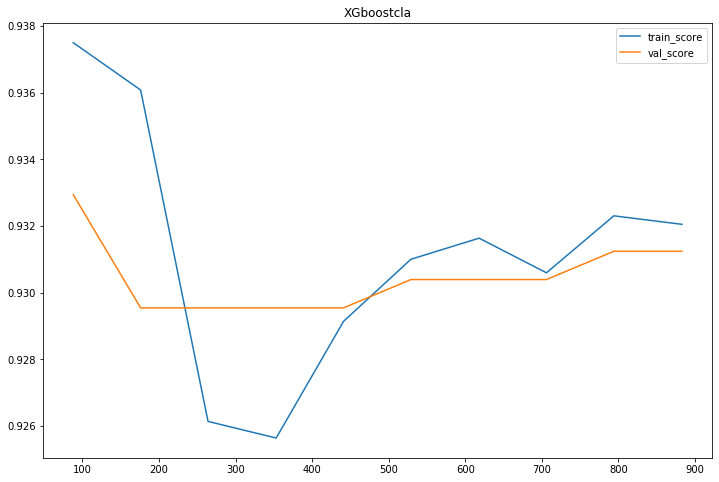


____________________________________________________________________________________



In [85]:
for name,model in models_pipe.items() : 
    print(name)
    evaluate(model)


In [54]:
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=4))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=4),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__order': 'C',
 'pipeline__se

In [55]:
params = {'svc__gamma':[1e-3, 1e-4],
          'svc__C':[1.0,10.0,100.0,1000.0],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

In [56]:
 #        'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],

In [57]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [93]:
#grid = GridSearchCV(SVM, params,scoring='accuracy',cv=4)
grid = RandomizedSearchCV(SVM, params,scoring='accuracy',cv=4,n_iter=20)
grid.fit(X_train,y_train)
print(grid.best_params_)

svm_pred = grid.predict(X_test)

print(classification_report(y_test,svm_pred))

{'svc__gamma': 0.001, 'svc__C': 1000.0, 'pipeline__selectkbest__k': 2, 'pipeline__polynomialfeatures__degree': 4}
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



In [94]:
precision,recall,threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

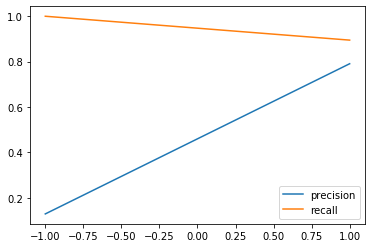

In [95]:
plt.plot(threshold,precision[:-1], label="precision")
plt.plot(threshold,recall[:-1], label="recall")
plt.legend()

In [96]:
def final(model,X,treshold=0):
    return model.decision_function(X) > treshold

In [97]:
grid

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest(k=4))])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=0))]),
                   n_iter=20,
                   param_distributions={'pipeline__polynomialfeatures__degree': [2,
                                                                                 3,
                                                                                 4],
                                        'pipeline__selectkbest__k': range(2,

In [102]:
f_pred = final(grid.best_estimator_,X_test,treshold=0.99)

In [103]:
f1_score(y_test,f_pred)

0.8395061728395061

In [104]:
recall_score(y_test,f_pred)

0.8947368421052632

In [105]:
print(classification_report(y_test,f_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



In [66]:
XGboostcla.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('xgbclassifier',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                 importance_type='gain', interaction_constraints='',
                 learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                 tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'xgbclassifier': XGBCla

In [67]:
paramsXGB = {
          'xgbclassifier__gamma' : [0],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

In [68]:
#grid = GridSearchCV(SVM, params,scoring='accuracy',cv=4)
grid = RandomizedSearchCV(XGboostcla, paramsXGB,scoring='accuracy',cv=4,n_iter=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

xg_pred = grid.predict(X_test)

print(classification_report(y_test,xg_pred))

{'xgbclassifier__gamma': 0, 'pipeline__selectkbest__k': 16, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       257
         1.0       0.79      0.89      0.84        38

    accuracy                           0.96       295
   macro avg       0.89      0.93      0.91       295
weighted avg       0.96      0.96      0.96       295



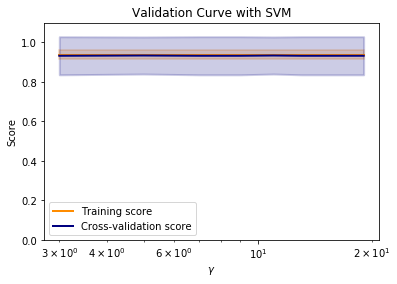

In [106]:
#param_range = np.logspace(-6, -1, 5)
param_range = np.arange(3, 20, 2)
train_scores, test_scores = validation_curve(
    SVM, X, y, param_name="svc__gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()